# 1. Setting Up

In [64]:
import numpy as np
import pandas as pd
import kneed as kneed
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator

# 2. Loading the Dataset

Action Schema Dataset

In [65]:
filepath = "/home/ramya/my-workspace/src/feeding_study_cleanup/scripts/action_schema_data (3).csv"
data = pd.read_csv(filepath)
print("original shape: ",data.shape)


# Drop the rows aren't skewered items. Using substrings due to naming
# inconsistencies (e.g., doughnutholes vs. donutholes)
skewered_item_substrings = [
    "chicken",
    "broc",
    "fri",
    "bagel",
    "nut",
    "lettuce",
    "spinach",
    "sand",
    "pizza",
]

rows_to_drop = []
#for i, row in data.iterrows():
#    is_skewered = False
#    for substr in skewered_item_substrings:
#        if substr in row["Bag File Name"]:
#            is_skewered = True
#            break
            
#    if not is_skewered:
#        rows_to_drop.append(i)

# Drop outliers 
# 3-fries-4
# 8-broccoli-5
# 3-chicken-1
for i, row in data.iterrows():
    is_skewered = False
    #if  "noodle" in row["Bag File Name"]:
    #    continue
        #rows_to_drop.append(i)
    if  "3-fries-4" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "3-chicken-1" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "5-pizza-3" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-4" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-2" in row["Bag File Name"]:
        rows_to_drop.append(i)
    if  "9-noodles-3" in row["Bag File Name"]:
        rows_to_drop.append(i)
    #rows_to_drop.append(i)
        
data  = data.drop(rows_to_drop, axis=0)
print("after dropping non-skewered and outliers ", data.shape)

        
# Drop any row containing nan or inf
data = data[np.all(data != np.nan, axis=1)]
data = data[np.all(data != np.inf, axis=1)]
data = data[np.all(data != -np.inf, axis=1)]
print("after dropping nan, inf: ",data.shape)



# Drop all nonnumeric data
data  = data.drop([
    "Participant",
    "Food",
    "Trial",
    "Bag File Name",
    "Save Timestamp",
    "Action Start Time",
    "Action Contact Time",
    "Action Extraction Time",
    "Action End Time",
    "Bag Duration",
    "Food Reference Frame Translation X",
    "Food Reference Frame Translation Y",
    "Food Reference Frame Translation Z",
    "Food Reference Frame Rotation X",
    "Food Reference Frame Rotation Y",
    "Food Reference Frame Rotation Z",
], axis=1)
print("after non number columns ", data.shape)



# Replace with substrings for mean and stdev
#data.loc[data['Bag File Name'].str.contains('chicken'), 'Bag File Name'] = 'chicken'
#data.loc[data['Bag File Name'].str.contains('broc'), 'Bag File Name'] = 'broc'
#data.loc[data['Bag File Name'].str.contains('fri'), 'Bag File Name'] = 'fri'
#data.loc[data['Bag File Name'].str.contains('bagel'), 'Bag File Name'] = 'bagel'
#data.loc[data['Bag File Name'].str.contains('nut'), 'Bag File Name'] = 'nut'
#data.loc[data['Bag File Name'].str.contains('lettuce'), 'Bag File Name'] = 'lettuce'
#data.loc[data['Bag File Name'].str.contains('spinach'), 'Bag File Name'] = 'spinach'
#data.loc[data['Bag File Name'].str.contains('sand'), 'Bag File Name'] = 'sand'
#data.loc[data['Bag File Name'].str.contains('pizza'), 'Bag File Name'] = 'pizza'
# replace the nonskwered
#data.loc[data['Bag File Name'].str.contains('potato'), 'Bag File Name'] = 'potato'
#data.loc[data['Bag File Name'].str.contains('rice'), 'Bag File Name'] = 'rice'
#data.loc[data['Bag File Name'].str.contains('noodle'), 'Bag File Name'] = 'noodle'
#data.loc[data['Bag File Name'].str.contains('jello'), 'Bag File Name'] = 'jello'
data.shape

original shape:  (412, 42)
after dropping non-skewered and outliers  (406, 42)
after dropping nan, inf:  (400, 42)
after non number columns  (400, 26)


(400, 26)

**Shape**: First value is the total number of trials, second is the number of columns (26 means only the action schema)

# 3. Running K-Means

We will now run k-means to cluster the dataset, using sklearn's [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Set `random_state=416`.

In [79]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=416).fit(data)
kmeans.cluster_centers_

array([[-6.40102072e-04,  8.86504328e-03,  9.91637078e-03,
        -6.59390650e-03,  7.49948406e-02,  1.29638522e-01,
         1.70174100e+00, -1.09536335e-01, -2.66312872e-01,
         2.38062250e+00,  5.49796417e-03,  2.93570225e-03,
         2.51303558e-02,  2.32728472e-02,  1.06679148e-01,
         4.02731285e-02,  5.41765588e+01,  1.33005720e-02,
         2.03736151e+00, -2.16030799e-02,  6.10435228e-02,
        -2.37129586e-01, -1.53545618e+00, -4.58152014e-01,
         7.00490627e-01,  1.62112675e-01,  2.22044605e-16],
       [-4.60746132e-03,  1.47095595e-02, -9.49246145e-04,
        -1.65580686e-02,  7.20748315e-02,  1.15652156e-01,
         2.34698122e+00,  5.70266848e-03, -1.75349251e-01,
         2.22389121e+00,  1.22158255e-02,  2.38674836e-02,
         3.37403112e-02, -2.61671804e-01,  1.80739715e-01,
         3.76092737e-01,  3.61674324e+00,  3.57579932e-03,
         2.19478750e+00,  2.17949117e-02,  8.37774839e-02,
        -7.13382655e-02, -7.50985368e-01,  1.09947258e-

For visualization purposes, let's add the cluster labels to the pandas dataframe.

In [80]:
data["Clusters k=%d" % k] = kmeans.labels_
data

,Pre-Grasp Target Offset X,Pre-Grasp Target Offset Y,Pre-Grasp Target Offset Z,Pre-Grasp Initial Utensil Transform Translation X,Pre-Grasp Initial Utensil Transform Translation Y,Pre-Grasp Initial Utensil Transform Translation Z,Pre-Grasp Initial Utensil Transform Rotation X,Pre-Grasp Initial Utensil Transform Rotation Y,Pre-Grasp Initial Utensil Transform Rotation Z,Pre-Grasp Force Threshold,Grasp In-Food Twist Linear X,Grasp In-Food Twist Linear Y,Grasp In-Food Twist Linear Z,Grasp In-Food Twist Angular X,Grasp In-Food Twist Angular Y,Grasp In-Food Twist Angular Z,Grasp Force Threshold,Grasp Torque Threshold,Grasp Duration,Extraction Out-Of-Food Twist Linear X,Extraction Out-Of-Food Twist Linear Y,Extraction Out-Of-Food Twist Linear Z,Extraction Out-Of-Food Twist Angular X,Extraction Out-Of-Food Twist Angular Y,Extraction Out-Of-Food Twist Angular Z,Extraction Duration,Clusters k=5,Clusters k=7
0,-0.041459,0.003550,0.012722,-0.129101,0.150542,0.069629,2.937692,-0.381982,0.112104,2.036811,0.011675,-0.001656,0.018420,0.011023,0.244104,0.048999,41.280463,0.008740,1.440005,-0.020728,0.190108,-0.367993,-3.567195,-0.766512,0.898645,0.100005,3,3
1,0.010731,-0.005239,0.006849,-0.010524,0.196402,0.069904,2.935139,-0.363191,0.526685,2.203443,0.000831,-0.011271,0.025922,0.106702,0.163523,0.337550,56.794800,0.006205,1.200007,-0.005631,0.207744,-0.293121,-3.006715,0.227578,0.310737,0.120020,0,0
2,-0.012778,0.010150,0.008748,-0.036633,0.199742,0.050202,2.784897,-0.404144,0.295010,2.326147,0.014211,-0.009797,0.021158,0.171883,0.136879,-0.238853,38.422156,0.007728,1.390033,-0.114064,0.146363,-0.203432,-1.109374,-1.014674,1.063084,0.179929,3,3
3,0.024656,0.005912,-0.005967,-0.214852,0.184941,0.056350,3.054785,0.029802,-0.889790,1.934568,-0.028361,-0.018567,0.039453,0.566712,-0.039983,1.487655,38.805405,0.007899,0.570014,-0.329614,0.322192,-0.058630,-2.594629,-0.748634,2.968346,0.139997,3,3
4,-0.007120,0.013073,-0.013193,-0.053275,0.126154,0.069476,3.060639,-0.211390,0.373323,1.809644,0.017202,0.020132,0.023039,-0.151539,0.241217,0.294960,26.321523,0.002586,0.600011,-0.031100,0.308306,-0.385536,-3.719002,-0.458088,1.338450,0.089975,1,2
5,-0.026913,0.019952,-0.010339,-0.183509,0.087377,0.058439,2.799705,0.150847,-0.992018,1.929382,0.004885,-0.009173,0.012497,0.095793,0.102412,0.329493,32.988021,0.008082,0.810016,0.003144,0.093679,-0.205633,-1.978570,-0.522988,0.828111,0.180047,3,2
6,-0.007231,0.013953,0.007085,-0.198940,0.127419,0.075440,2.613942,0.089360,-0.315542,1.881387,0.002003,-0.007499,0.028630,0.205771,0.005849,-0.074870,30.974922,0.006221,1.089928,-0.066405,0.089595,-0.325105,-1.894635,-0.705304,0.679395,0.110073,3,2
7,-0.000602,0.005268,0.004812,0.008690,-0.001292,0.047468,2.912069,-0.257302,0.712888,1.578559,-0.001464,0.002385,0.017895,0.048720,0.114679,-0.047995,17.633209,0.002354,0.939970,0.047463,0.089586,-0.265197,-2.856875,0.518856,0.888193,0.089974,1,5
8,-0.016579,-0.002258,0.011491,-0.221977,-0.024014,0.086785,2.756504,0.380239,-0.852162,1.948851,0.006800,-0.001132,0.016847,0.223070,0.075709,-0.306897,16.934404,0.001943,1.129980,-0.047297,0.108103,-0.307189,-2.726254,-0.659227,0.170994,0.059983,1,5
9,-0.003407,0.009592,0.005776,-0.051192,0.070201,0.123707,3.019700,-0.438947,1.303030,2.003054,0.008932,-0.007732,0.045482,0.407071,0.110474,-0.416839,11.184289,0.003052,0.679930,0.103527,0.310779,-0.373943,-4.447449,0.411861,-0.209928,0.090200,2,5


**Questions**: What trends do you observe? What underlying patterns might the clustering algorithm have picked up on?

# 4. Selecting K

Sklearn's KMeans classifier's `inertia_` property returns the objective function, or quality, of the clustering. 

**Question**: What would we expect the inertia to be when k=59?

In [68]:
ks = []
inertias = []
for k in range(1, 60, 2):
    ks.append(k)
    kmeans = KMeans(n_clusters=k).fit(data)
    inertias.append(kmeans.inertia_)

Graph it out

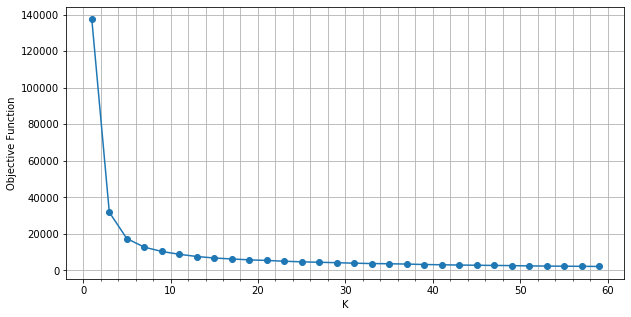

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ks, inertias, marker='o')
#ax.set_ylim(0, 50)
ax.set_xlabel("K")
ax.set_ylabel("Objective Function")
ax.set_xticks(range(0, ks[-1], 2), minor=True)
ax.grid(which='both')

**Question**: What appears to be the best value of k?

In [78]:
kl = KneeLocator(range(1, 60, 2), inertias, curve="convex", direction="decreasing")
kl.elbow

7

**Does this work? It seems wrong**